### Check which model will be best

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def train_and_evaluate_models(X_train, X_test, Y_train, Y_test):
    models = {
        "Logistic Regression": LogisticRegression(random_state=2, max_iter=1500),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=2),
        "Random Forest": RandomForestClassifier(random_state=2, n_estimators=100),
       
        "SVM (Linear Kernel)": SVC(kernel='linear', random_state=2)
    }
    
    results = {}
    
    for model_name, model in models.items():
        model.fit(X_train, Y_train)
        
        train_predictions = model.predict(X_train)
        train_accuracy = accuracy_score(Y_train, train_predictions)
        
        test_predictions = model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, test_predictions)
        
        results[model_name] = {
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy
        }
        print(f"{model_name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")
    
    return results

if __name__ == "__main__":
    file_path = 'datasets/diabetes.csv'
    diabetes_dataset = pd.read_csv(file_path)
    
    X = diabetes_dataset.drop(columns='Outcome', axis=1)
    Y = diabetes_dataset['Outcome']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    results = train_and_evaluate_models(X_train, X_test, Y_train, Y_test)
    
    best_model = max(results, key=lambda x: results[x]["Test Accuracy"])
    print(f"\nThe best model is {best_model} with Test Accuracy = {results[best_model]['Test Accuracy']:.4f}")


Logistic Regression: Train Accuracy = 0.7850, Test Accuracy = 0.7597
K-Nearest Neighbors: Train Accuracy = 0.8274, Test Accuracy = 0.7143
Decision Tree: Train Accuracy = 1.0000, Test Accuracy = 0.7013
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.7208
SVM (Linear Kernel): Train Accuracy = 0.7866, Test Accuracy = 0.7727

The best model is SVM (Linear Kernel) with Test Accuracy = 0.7727


### Training and saving model File

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


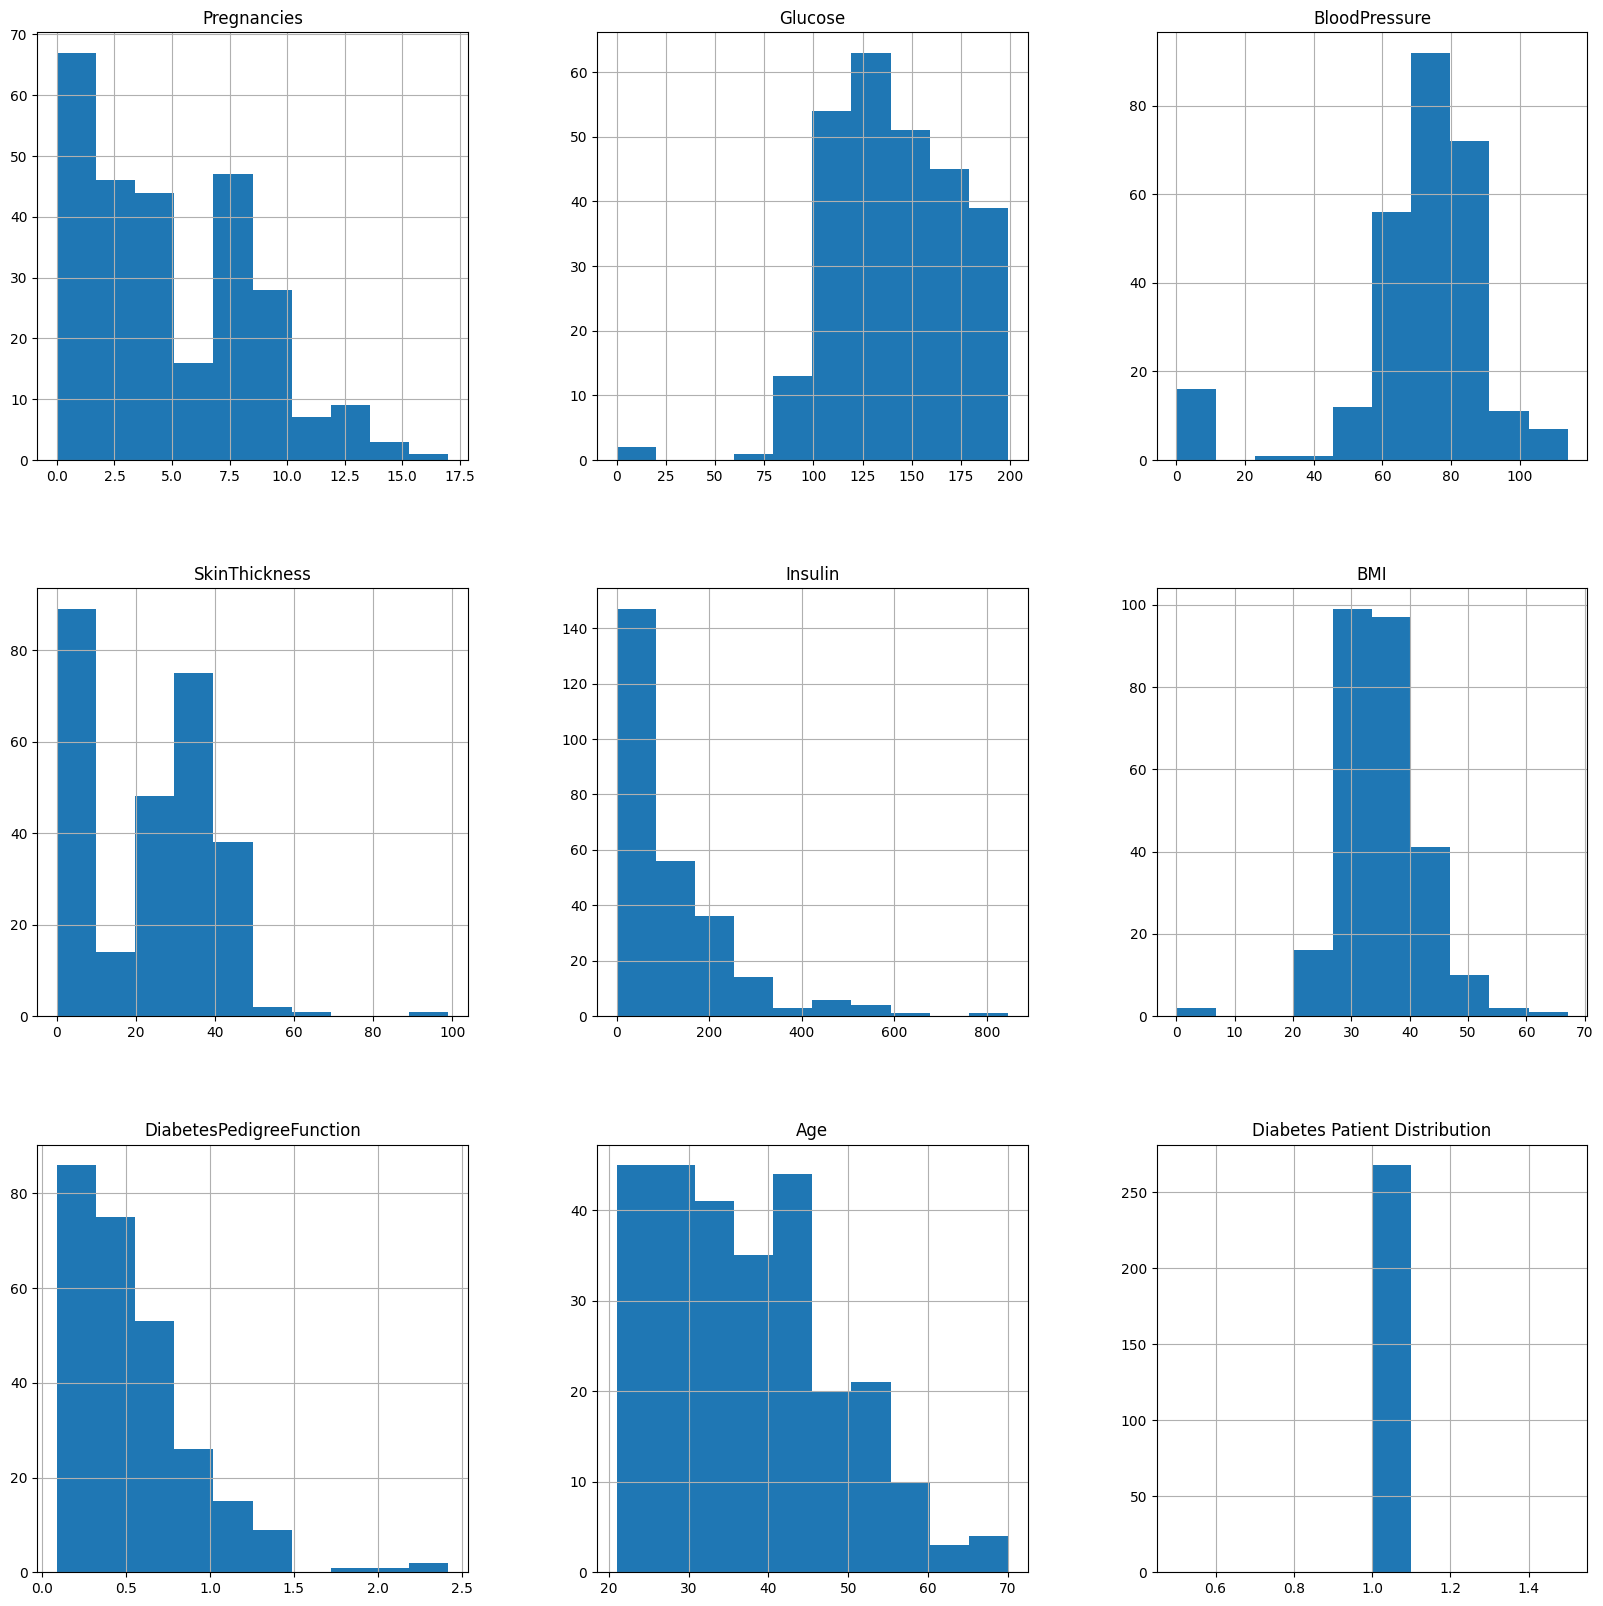

Data shapes: X=(614, 8), X_train=(614, 8), X_test=(154, 8)
Accuracy score of the training data: 0.7866449511400652
Accuracy score of the test data: 0.7727272727272727
The person is diabetic.


C:\Users\Hackurr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt

def load_and_explore_data(file_path):
    
    diabetes_dataset = pd.read_csv(file_path)
    print(diabetes_dataset.info())
    diabetes_dataset[diabetes_dataset['Outcome'] == 1].hist(figsize=(20, 20))
    plt.title('Diabetes Patient Distribution')
    plt.show()
    return diabetes_dataset

def preprocess_data(dataset):
   
    X = dataset.drop(columns='Outcome', axis=1)
    Y = dataset['Outcome']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, Y_train, Y_test, scaler

def train_model(X_train, Y_train):
    
    classifier = SVC(kernel='linear', random_state=2)
    classifier.fit(X_train, Y_train)
    return classifier

def evaluate_model(model, X, Y, dataset_type="training"):
    
    predictions = model.predict(X)
    accuracy = accuracy_score(predictions, Y)
    print(f'Accuracy score of the {dataset_type} data: {accuracy}')
    return accuracy

def save_model(model, scaler, filename):
    
    with open(filename, 'wb') as file:
        pickle.dump({'model': model, 'scaler': scaler}, file)

def load_model(filename):
   
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data['model'], data['scaler']

def predict(model, scaler, input_data):
    
    try:
        input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
        input_data_scaled = scaler.transform(input_data_as_numpy_array)
        prediction = model.predict(input_data_scaled)
        return prediction[0]
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

if __name__ == "__main__":
    file_path = 'datasets/diabetes.csv'
    diabetes_dataset = load_and_explore_data(file_path)

    X_train, X_test, Y_train, Y_test, scaler = preprocess_data(diabetes_dataset)
    print(f"Data shapes: X={X_train.shape}, X_train={X_train.shape}, X_test={X_test.shape}")

    model = train_model(X_train, Y_train)

    evaluate_model(model, X_train, Y_train, "training")
    evaluate_model(model, X_test, Y_test, "test")

    save_model(model, scaler, 'diabetes_model.sav')

    loaded_model, loaded_scaler = load_model('diabetes_model.sav')

    input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
    result = predict(loaded_model, loaded_scaler, input_data)

    if result == 0:
        print("The person is not diabetic.")
    elif result == 1:
        print("The person is diabetic.")
